In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
%matplotlib inline

Using TensorFlow backend.


# Load data

In [2]:
#Import datasets
table_interac = pd.read_csv('Table_E-Final_interaction_pairs.tab',sep='\t',header=0)

#---------------------------------------------------------------------
#Pre process data
#---------------------------------------------------------------------
x = table_interac.iloc[:, 5:].values
y = table_interac.iloc[:, 2].values 

# Replace all NaN values by 0's
where_are_nans = np.isnan(x)
x[where_are_nans] = 0

In [3]:
table_interac.head()

,CYP-Isoform,Drug Identifier,Interaction type,CYP,Isoform,[G1.1.1.1],[G1.1.1.2],[G1.1.1.3],[G1.1.1.4],[G1.1.1.5],...,EState_VSA10,VSA_EState1,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9
0,1A2-1,dinoprostone,1.0,1A2,1,6.019417,1.359223,4.466019,5.048544,6.407767,...,19.802129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.166667
1,1A2-2,dinoprostone,1.0,1A2,2,6.007752,1.356589,4.457364,5.038760,6.395349,...,19.802129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.166667
2,3A5-2,dinoprostone,0.0,3A5,2,3.571429,2.857143,2.857143,2.857143,2.857143,...,19.802129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.166667
3,3A7-2,dinoprostone,0.0,3A7,2,3.738318,1.495327,4.859813,5.794393,6.542056,...,19.802129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.166667
4,2C19-1,dinoprostone,0.0,2C19,1,3.469388,2.653061,4.897959,6.734694,6.734694,...,19.802129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.166667


In [3]:
# Splitting the dataset into 80% for Training and and 20% for Test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state=0)

In [4]:
# Define scaler
scaler = StandardScaler().fit(x_train)

# Scale the train set
x_train = scaler.transform(x_train)

# Scale the test set
x_test = scaler.transform(x_test)

In [5]:
x_train.shape

(4249, 3049)

In [6]:
# Initialize network constructor
model = Sequential()

# Add an input layer
model.add(Dense(3050, activation='relu', input_shape=(3049,)))

# Add first hidden layer
model.add(Dense(2000, activation='relu'))

# Add second hidden layer
model.add(Dense(2000, activation='relu'))

# Add output layer
model.add(Dense(1,activation='sigmoid'))

In [7]:
# Explore the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3050)              9302500   
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              6102000   
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2001      
Total params: 19,408,501
Trainable params: 19,408,501
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 3049),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_1',
   'trainable': True,
   'units': 3050,
   'use_bias': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kerne

In [10]:
model.get_weights()

[array([[-0.02665028, -0.00758465,  0.01898152, ..., -0.00457115,
          0.01166644,  0.00961821],
        [-0.02621221, -0.00699233,  0.01516869, ..., -0.00778207,
          0.0262344 , -0.02447402],
        [ 0.00416301,  0.02317069, -0.00880719, ...,  0.01529177,
         -0.00230774,  0.02219001],
        ..., 
        [ 0.00478652, -0.00396088,  0.0128891 , ..., -0.00503673,
          0.0029055 , -0.02154071],
        [-0.01128235, -0.02578451, -0.01863295, ...,  0.00085334,
         -0.00806278,  0.02134996],
        [-0.01677993, -0.00270708, -0.01669233, ...,  0.01717123,
          0.00827562, -0.01564927]], dtype=float32),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32),
 array([[ 0.01277915, -0.0059301 , -0.026555  , ..., -0.02575341,
         -0.00177571,  0.03131654],
        [ 0.01108502, -0.00778825, -0.02663662, ...,  0.02008879,
          0.01722683,  0.03443526],
        [-0.02654164, -0.02589973, -0.00302663, ..., -0.02584199,
         -0.00633053, -0.00

# Compile model and fit

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
Nepochs = 145                 
model.fit(x_train, y_train,epochs=Nepochs, batch_size=10, verbose=1)

Epoch 1/145
4249/4249 [==============================] - 147s - loss: 1.0888 - acc: 0.5674   
Epoch 2/145
4249/4249 [==============================] - 143s - loss: 0.6432 - acc: 0.6289   
Epoch 3/145
4249/4249 [==============================] - 145s - loss: 0.6032 - acc: 0.6700   
Epoch 4/145
4249/4249 [==============================] - 145s - loss: 0.6002 - acc: 0.6771   
Epoch 5/145
4249/4249 [==============================] - 153s - loss: 0.5572 - acc: 0.7131   
Epoch 6/145
4249/4249 [==============================] - 144s - loss: 0.5439 - acc: 0.7206   
Epoch 7/145
4249/4249 [==============================] - 149s - loss: 0.5216 - acc: 0.7402   
Epoch 8/145
4249/4249 [==============================] - 157s - loss: 0.5011 - acc: 0.7484   
Epoch 9/145
4249/4249 [==============================] - 149s - loss: 0.4870 - acc: 0.7639   
Epoch 10/145
4249/4249 [==============================] - 145s - loss: 0.4464 - acc: 0.7774   
Epoch 11/145
4249/4249 [==============================] - 1

In [127]:
import h5py

In [9]:
model.save('SerendipiANN_v0.h5')

# Make predictions with test data

In [10]:
y_pred = model.predict(x_test)

# Compare y_pred against y_test to see how well the predictions performed

In [11]:
score = model.evaluate(x_test,y_test,verbose=1)

1063/1063 [==============================] - 3s     


In [13]:
print("Loss=",round(score[0],4))
print("Accuracy=",round(score[1],4))

Loss= 1.3969
Accuracy= 0.7723


# Test out some basic classification evaluation techniques:

- The confusion matrix, which is a breakdown of predictions into a table showing correct predictions and the types of incorrect predictions made. Ideally, you will only see numbers in the diagonal, which means that all your predictions were correct!
- Precision is a measure of a classifier’s exactness. The higher the precision, the more accurate the classifier.
- Recall is a measure of a classifier’s completeness. The higher the recall, the more cases the classifier covers.
- The F1 Score or F-score is a weighted average of precision and recall.
- The Kappa or Cohen’s kappa is the classification accuracy normalized by the imbalance of the classes in the data.

In [12]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred = np.round(y_pred)

# Confusion matrix
print('Confusion matrix:\n')
print(confusion_matrix(y_test, y_pred))
       
# Precision 
print('Precision')
print(precision_score(y_test, y_pred))

# Recall
print('Recall')
print(recall_score(y_test, y_pred))


# F1 score
print('F1 score')
print(f1_score(y_test,y_pred))


# Cohen's kappa
print("Cohen's kappa")
print(cohen_kappa_score(y_test, y_pred))

Confusion matrix:

[[366 165]
 [ 77 455]]
Precision
0.733870967742
Recall
0.855263157895
F1 score
0.789930555556
Cohen's kappa
0.544613521781


# Plot the time course of training NEURAL NETWORK

In [14]:
f = open('ANN_v0_training_145epochs.log','r')
log = f.read().splitlines()
f.close()

In [16]:
# Extract accuracies and epoch times from log file
training_acc = []
epoch_time = []
training_loss = []
for l in log:
    if 'acc:' in l:
        acc = float(l[l.index('acc:')+4:].replace(' ',''))
        training_acc.append(acc)
        start = l.index('] - ')+4
        end = l.index('s',start)
        et = float(l[start:end])
        epoch_time.append(et)
        start = l.index('loss: ')+6
        end = start + 6
        lo = float(l[start:end])
        training_loss.append(lo)        
    else:
        continue

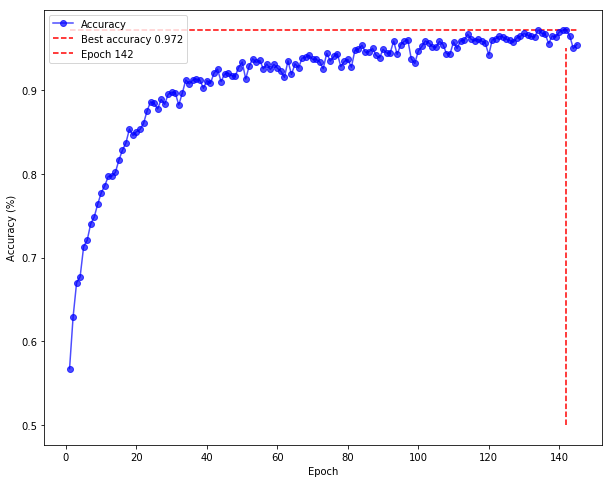

In [19]:
# Plot Accuracies
plt.figure(figsize=(10,8))
plt.plot(range(1,len(training_acc)+1),training_acc,'b-o',label='Accuracy',alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.hlines(max(training_acc),1,Nepochs,colors='r',linestyles='dashed',label='Best accuracy ' + str(max(training_acc)))
plt.vlines(training_acc.index(max(training_acc))+1,0.5,0.95,colors='r',linestyles='dashed',label='Epoch '+str(training_acc.index(max(training_acc))+1))
plt.legend()

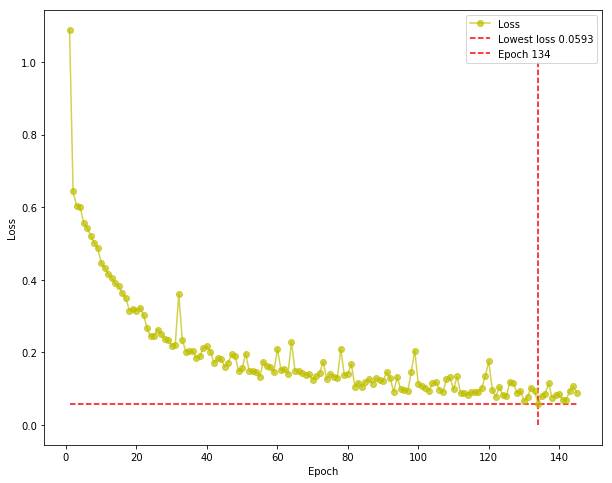

In [20]:
# Plot Loss
plt.figure(figsize=(10,8))
plt.plot(range(1,len(training_loss)+1),training_loss,'y-o',label='Loss',alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.hlines(min(training_loss),1,Nepochs,colors='r',linestyles='dashed',label='Lowest loss ' + str(min(training_loss)))
plt.vlines(training_loss.index(min(training_loss))+1,0.,1.,colors='r',linestyles='dashed',label='Epoch '+str(training_loss.index(min(training_loss))+1))
plt.legend()

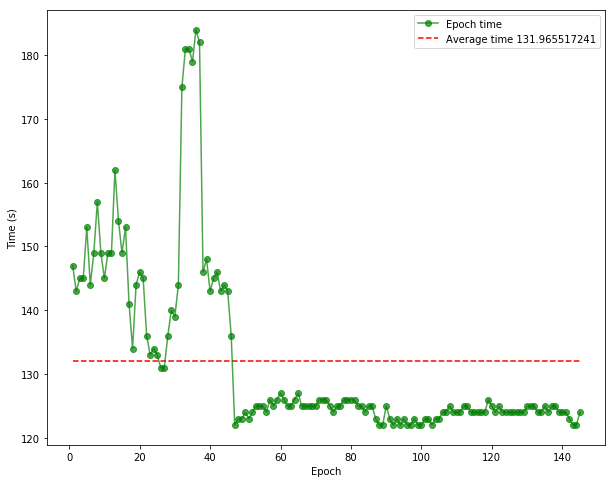

In [21]:
# Plot Epoch times
plt.figure(figsize=(10,8))
plt.plot(range(1,len(epoch_time)+1),epoch_time,'g-o',label='Epoch time',alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Time (s)')
plt.hlines(np.mean(epoch_time),1,Nepochs,colors='r',linestyles='dashed',label='Average time ' + str(np.mean(epoch_time)))
plt.legend()